# Movie Analysis
Vishal Dodamani


https://www.kaggle.com/rounakbanik/the-movies-dataset

## Introduction

Movies are an essential and critical source of entertainment for the majority of the population in the United States and throughout the world. As technology has been improving in recent decades, the potential market in the movie industry has exponentially increased since technology becomes sufficient to realize certain pictures of movies that we could not have done before. It is not ample enough for a movie that is solely supported by the fancy technology on visual pictures. Audience preference and taste would be another crucial factor for a movie that will be appraised by the general public.
The main goal of our project is to examine a sample of 45,000 movies along with 25 characteristics for each movie from the last several decades and explore actual and potential patterns and trends that may influence the overall popularity of a given movie. Moreover, the purpose is through the analysis of the previous movie data set, we could gather insights on how to make a successful and reputational movie in the future that would bring fortune to the production company and the values whole society as a whole. We aim to explore how factors such as film studios, revenue, awards, genres, release dates, budgets, and even casts that have affected movie popularity.

We quickly discovered that a considerable amount of cleaning was required on the dataframe and since there were multiple columns with multiple values in each row-column block, we had to create various datframes that allowed for unique sorting by certain Years, Genres, etc.

## Import various packages

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import re
import json
from ast import literal_eval
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk
import string, itertools
from collections import Counter, defaultdict
pd.set_option('max_columns', 40)
pd.set_option('colwidth', 300)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yahle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yahle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yahle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
movies_meta = pd.read_csv('movies_metadata.csv',low_memory=False)

Display movies meta data file. This will be our primary file for analysis. We may concatenate it with other files to create a more comprehensive data frame.

In [3]:
movies_meta.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'}",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the 

Clean the meta data frame. Remove colums that we are not interested

In [4]:
movies_meta= movies_meta.drop(columns = 'adult')
movies_meta= movies_meta.drop(columns = 'homepage')
movies_meta= movies_meta.drop(columns = 'tagline')
movies_meta= movies_meta.drop(columns = 'status')
movies_meta= movies_meta.drop(columns = 'id')
movies_meta= movies_meta.drop(columns = 'poster_path')
movies_meta= movies_meta.drop(columns = 'overview')
movies_meta= movies_meta.drop(columns = 'imdb_id')
movies_meta= movies_meta.drop(columns = 'belongs_to_collection')
movies_meta= movies_meta.drop(columns = 'original_language')
movies_meta= movies_meta.drop(columns = 'video')
movies_meta= movies_meta.drop(columns = 'vote_count')
movies_meta= movies_meta.drop(columns = 'vote_average')

Clean the data. Remove brackets and excess characters from syntax of production, genre, language, production columns. (.split functions?)

Display the top X number of movies by revenue.

In [5]:
b=movies_meta['genres']
c=literal_eval(b[0])
print(c)

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [6]:
columns1 = ['id', 'name']
df_temp1=pd.DataFrame(c, columns = columns1)
df_temp1

,id,name
0,16,Animation
1,35,Comedy
2,10751,Family


In [7]:
#def Clean_Genre(col):
b=movies_meta['genres']
gen_col = []
for row in range(len(b)):
    try:
        row_list = []
        c=literal_eval(b[row])
        columns1 = ['id', 'name']
        df_temp1=pd.DataFrame(c, columns = columns1)
        [row_list.append(i) for i in df_temp1['name']]
        gen_col.append(str(row_list)[1:-1])
    except:
        gen_col.append(np.nan)
gen_df=pd.DataFrame(gen_col)

In [8]:
movies_meta['Genres'] = gen_df
movies_meta= movies_meta.drop(columns = 'genres')

In [9]:
#clean production countries column
c=movies_meta['production_countries']
lan_col = []
for row in range(len(c)):
    try:
        row_list1 = []
        d=literal_eval(c[row])
        columns2 = ['iso_3166_1', 'name']
        df_temp2=pd.DataFrame(d, columns = columns2)
        [row_list1.append(i) for i in df_temp2['name']]
        lan_col.append(str(row_list1)[1:-1])
    except:
        lan_col.append(np.nan)
lan_df=pd.DataFrame(lan_col)

In [10]:
movies_meta['production_countries'] = lan_df

In [11]:
#clean spoken language column
d=movies_meta['spoken_languages']
lan1_col = []
for row in range(len(d)):
    try:
        row_list2 = []
        e=literal_eval(d[row])
        columns3 = ['iso_639_1', 'name']
        df_temp3=pd.DataFrame(e, columns = columns3)
        [row_list2.append(i) for i in df_temp3['name']]
        lan1_col.append(str(row_list2)[1:-1])
    except:
        lan1_col.append(np.nan)
lan1_df=pd.DataFrame(lan1_col)

In [12]:
movies_meta['spoken_languages'] = lan1_df

In [13]:
#clean production companies column
e=movies_meta['production_companies']
pro_col = []
for row in range(len(e)):
    try:
        row_list3 = []
        f=literal_eval(e[row])
        columns4 = ['name', 'id']
        df_temp4=pd.DataFrame(f, columns = columns4)
        [row_list3.append(i) for i in df_temp4['name']]
        pro_col.append(str(row_list3)[1:-1])
    except:
        pro_col.append(np.nan)
pro_df=pd.DataFrame(pro_col)

In [14]:
movies_meta['production_companies'] = pro_df

In [15]:
#display the cleaned dataframe
movies_meta

,budget,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,Genres
0,30000000,Toy Story,21.946943,'Pixar Animation Studios','United States of America',1995-10-30,373554033.0,81.0,'English',Toy Story,"'Animation', 'Comedy', 'Family'"
1,65000000,Jumanji,17.015539,"'TriStar Pictures', 'Teitler Film', 'Interscope Communications'",'United States of America',1995-12-15,262797249.0,104.0,"'English', 'Français'",Jumanji,"'Adventure', 'Fantasy', 'Family'"
2,0,Grumpier Old Men,11.7129,"'Warner Bros.', 'Lancaster Gate'",'United States of America',1995-12-22,0.0,101.0,'English',Grumpier Old Men,"'Romance', 'Comedy'"
3,16000000,Waiting to Exhale,3.859495,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,81452156.0,127.0,'English',Waiting to Exhale,"'Comedy', 'Drama', 'Romance'"
4,0,Father of the Bride Part II,8.387519,"'Sandollar Productions', 'Touchstone Pictures'",'United States of America',1995-02-10,76578911.0,106.0,'English',Father of the Bride Part II,'Comedy'
5,60000000,Heat,17.924927,"'Regency Enterprises', 'Forward Pass', 'Warner Bros.'",'United States of America',1995-12-15,187436818.0,170.0,"'English', 'Español'",Heat,"'Action', 'Crime', 'Drama', 'Thriller'"
6,58000000,Sabrina,6.677277,"'Paramount Pictures', 'Scott Rudin Productions', 'Mirage Enterprises', 'Sandollar Productions', 'Constellation Entertainment', 'Worldwide', 'Mont Blanc Entertainment GmbH'","'Germany', 'United States of America'",1995-12-15,0.0,127.0,"'Français', 'English'",Sabrina,"'Comedy', 'Romance'"
7,0,Tom and Huck,2.561161,'Walt Disney Pictures','United States of America',1995-12-22,0.0,97.0,"'English', 'Deutsch'",Tom and Huck,"'Action', 'Adventure', 'Drama', 'Family'"
8,35000000,Sudden Death,5.23158,"'Universal Pictures', 'Imperial Entertainment', 'Signature Entertainment'",'United States of America',1995-12-22,64350171.0,106.0,'English',Sudden Death,"'Action', 'Adventure', 'Thriller'"
9,58000000,GoldenEye,14.686036,"'United Artists', 'Eon Productions'","'United Kingdom', 'United States of America'",1995-11-16,352194034.0,130.0,"'English', 'Pусский', 'Español'",GoldenEye,"'Adventure', 'Action', 'Thriller'"


## Import Movie Credits

In [16]:
credits = pd.read_csv('credits.csv',low_memory=False)

In [17]:
#clean cast column
ax=credits['cast']
cast_col = []
for row in range(len(ax)):
    try:
        row_list = []
        f=literal_eval(ax[row])
        columns1 = ['name']
        df_temp=pd.DataFrame(f, columns = columns1)
        [row_list.append(i) for i in df_temp['name']]
        cast_col.append(row_list)
    except:
        cast_col.append(np.nan)
cast_df=pd.DataFrame(cast_col)

### Merge movies_meta and cast_df dataframes

In [18]:
Movies_Meta_Cast = pd.concat([movies_meta, cast_df], axis=1)

## Sort Movies_Meta_Cast by Top 1000 grossing movies

In [19]:
Top_Gross_1000 = Movies_Meta_Cast.sort_values(by='revenue', ascending = False)[0:999]

### What actors are most common among the Top 1000 grossing movies

In [20]:
cast_list = []
C=Top_Gross_1000.iloc[:,11:]
for x in range(len(C)):
    [cast_list.append(row) for row in C.iloc[x]]
Top_Cast_df = pd.DataFrame(cast_list)
Top_Cast_df=Top_Cast_df.dropna()
Top_Money_Makers = pd.DataFrame(Top_Cast_df[0].value_counts())


### Visualize Top Money Makers

In [21]:
Top_Money_Makers = Top_Money_Makers.reset_index()

In [22]:
Top_Money_Makers.columns = ['Actor', 'Num of Movies']
Top_Ten_Money_Makers=Top_Money_Makers[:10]
#Top_Ten_Money_Makers

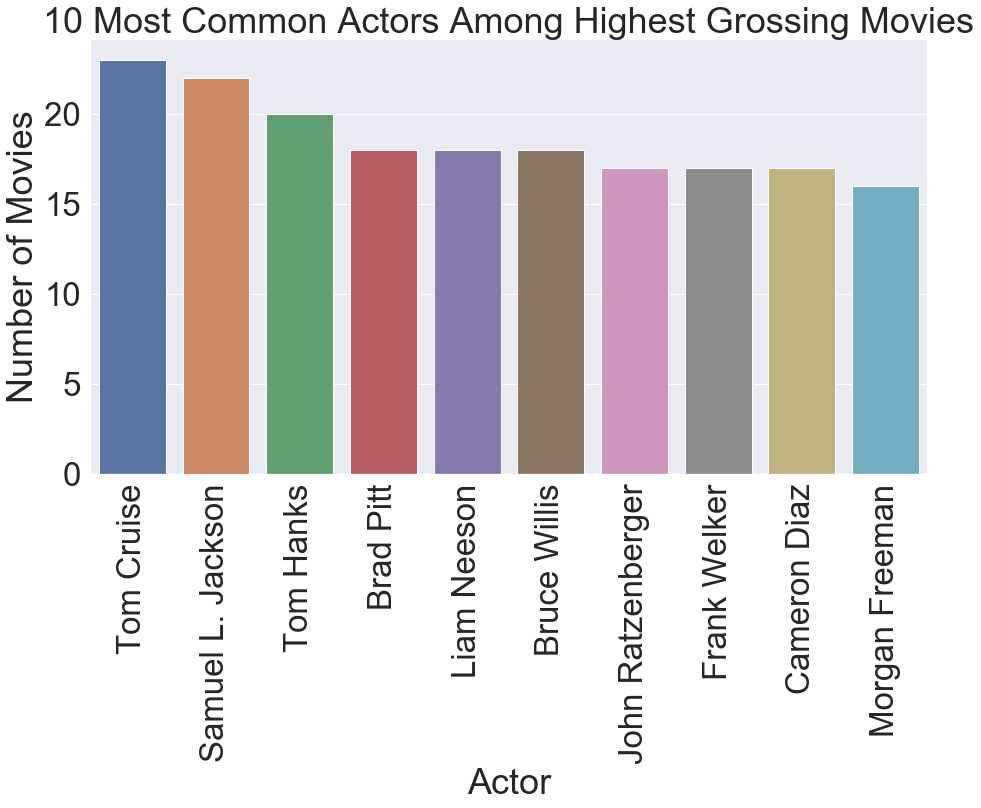

In [23]:
plt.figure(figsize=(15,8))
sns.set(font_scale=3)
sns.barplot(x=Top_Ten_Money_Makers['Actor'], y=Top_Ten_Money_Makers['Num of Movies']);
plt.ylabel('Number of Movies')
plt.title('10 Most Common Actors Among Highest Grossing Movies')
plt.xticks(rotation='vertical');

### Perhaps the most noteworthy actors are listed in this figure. Since this is based upon the number of movies each actor appears in among the top grossing films in the entire dataframe, it is not surprising that all of the actors listed are at least in their mid-40s. 

### Repeat cleaning process for future use. Allow for "dummy" variables instead of multiple values stored as easy-to-read strings. 

In [24]:
movies_meta2 = pd.read_csv('movies_metadata.csv',low_memory=False)
movies_meta2= movies_meta2.drop(columns = 'adult')
movies_meta2= movies_meta2.drop(columns = 'homepage')
movies_meta2= movies_meta2.drop(columns = 'tagline')
movies_meta2= movies_meta2.drop(columns = 'status')
movies_meta2= movies_meta2.drop(columns = 'id')
movies_meta2= movies_meta2.drop(columns = 'poster_path')
movies_meta2= movies_meta2.drop(columns = 'overview')
movies_meta2= movies_meta2.drop(columns = 'imdb_id')
movies_meta2= movies_meta2.drop(columns = 'belongs_to_collection')
movies_meta2= movies_meta2.drop(columns = 'original_language')
movies_meta2= movies_meta2.drop(columns = 'video')
movies_meta2= movies_meta2.drop(columns = 'vote_count')
movies_meta2= movies_meta2.drop(columns = 'vote_average')

### Repeat Process for Genres

In [25]:
#def Clean_Genre(col):
g=movies_meta2['genres']
gen_col2 = []
for row in range(len(g)):
    try:
        row_list = []
        c=literal_eval(g[row])
        columns1 = ['id', 'name']
        df_temp1=pd.DataFrame(c, columns = columns1)
        [row_list.append(i) for i in df_temp1['name']]
        gen_col2.append(row_list)
    except:
        gen_col2.append(np.nan)
gen_df=pd.DataFrame(gen_col2)

In [26]:
Movies_Meta_Genre = pd.concat([movies_meta2, gen_df], axis=1)
Genre_Gross_1000 = Movies_Meta_Genre.sort_values(by='revenue', ascending = False)[0:999]

In [27]:
Genre_list = []
G=Genre_Gross_1000.iloc[:,11:]
for x in range(len(G)):
    [Genre_list.append(row) for row in G.iloc[x]]
Top_Genres_df = pd.DataFrame(Genre_list)
Top_Genres_df=Top_Genres_df.dropna()
Top_Genres = pd.DataFrame(Top_Genres_df[0].value_counts())

In [28]:
Top_Genres = Top_Genres.reset_index()

In [29]:
Top_Genres.columns = ['Genre', 'Counts']
#Top_Genres

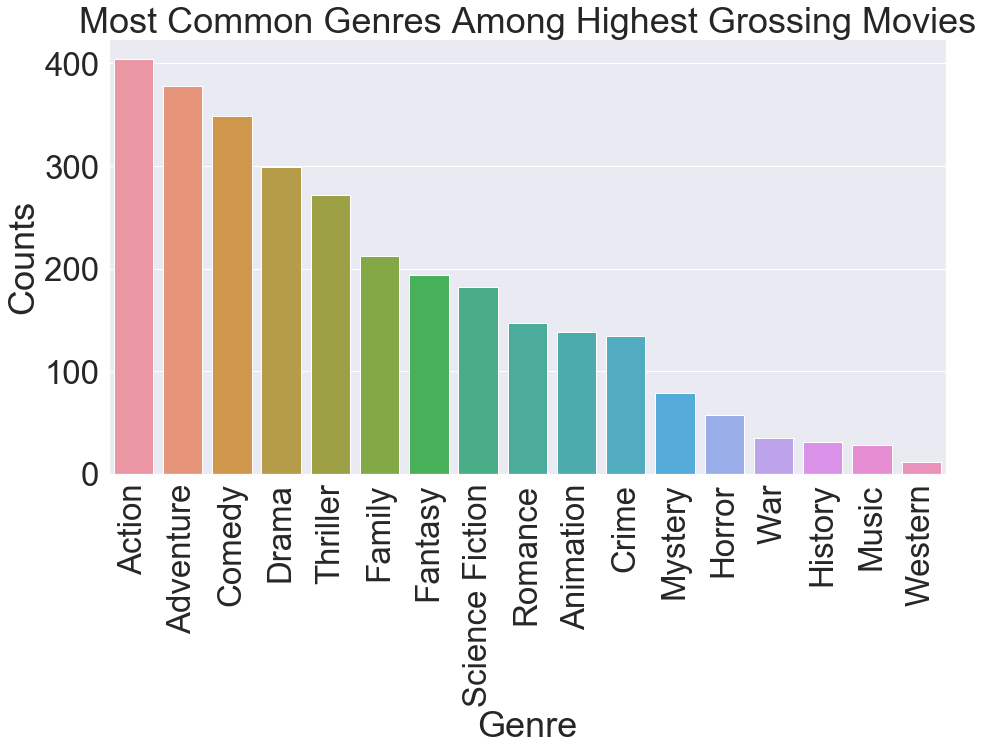

In [30]:
plt.figure(figsize=(15,8))
sns.set(font_scale=3)
sns.barplot(x=Top_Genres['Genre'], y=Top_Genres['Counts']);
plt.ylabel('Counts')
plt.title('Most Common Genres Among Highest Grossing Movies')
plt.xticks(rotation='vertical');

### Action, Adventure, Comedy, and Drama appear most often among the list of the 1000 top grossing movies. It seems that movies that do well are those that are more likely to appeal to different audience niches. That may be the same reason why the Family genre appears often. Since U.S. household size has continued to increase in recent years, the "families with young children" demographic is a key money-maker for an production company. It is not unsurprising that Westerns and Musicals appear least often since there are likely far-fewer movies released that fit those categories. 

## Create Word Cloud from keywords database (consists of keywords from each movie plot.

In [31]:
keywords = pd.read_csv('keywords.csv',low_memory=False)
keywords['keywords']
k=keywords['keywords']
word_list = []
for row in range(len(k)):
    try:
        row_list = []
        c=literal_eval(k[row])
        columns1 = ['id', 'name']
        df_temp=pd.DataFrame(c, columns = columns1)
        [row_list.append(i) for i in df_temp['name']]
        word_list.append(row_list)
    except:
        word_list.append(np.nan)

In [32]:
word_df = pd.DataFrame(word_list)
words_list = []
for x in range(len(word_df.columns)):
    [words_list.append(row) for row in word_df.iloc[x] if row]

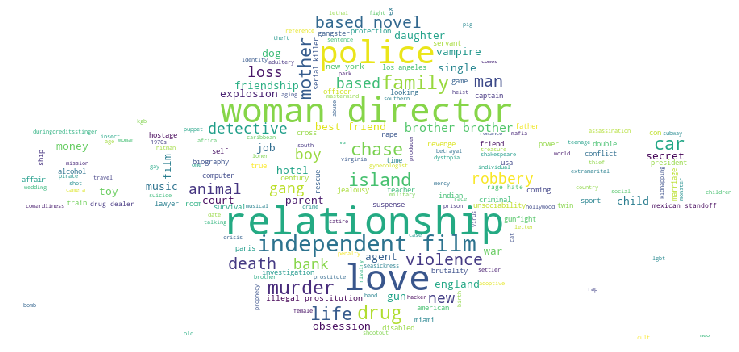

In [33]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

wordy=(" ").join(words_list)

wordy=(" ").join(words_list)
mask=np.array(Image.open(requests.get("https://library.kissclipart.com/20180830/wpw/kissclipart-universal-studios-logo-clipart-universal-pictures-929f14fbbc24a16e.jpg",
                                      stream=True).raw))
wc = WordCloud(background_color='white',stopwords=STOPWORDS, mask=mask).generate(' '.join(words_list))
plt.figure(figsize=(13,13))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)

### Relationship and Love are by far the most prominent words in the keywords dataframe. This seems to indicate that even if a givne movie is not primarily a "Romance" movie, romance is a key part of most stories. This may be by design in order to make movies more appealing to different kinds of people. (i.e. adding a romance subplot into a "War" movie so as to appeal to predominantly male and female audiences. 

## Average Revenue per Genre...

In [35]:
Genre_List = []
for row in Top_Genres['Genre']:
    Genre_List.append(row)

In [37]:
Genre_Revenue = []
for genre in Genre_List:
    Genre_Revenue.append(round(movies_meta[movies_meta['Genres'].str.contains(genre)==True]['revenue'].mean(),2))
Avg_Genre_Revenue = pd.DataFrame({'Genre':Genre_List, 'Avg Revenue': Genre_Revenue})
Avg_Genre_Revenue.sort_values(by=['Avg Revenue'], ascending = False)

,Genre,Avg Revenue
1,Adventure,57242375.14
6,Fantasy,44978258.25
5,Family,38713063.46
9,Animation,34917340.03
7,Science Fiction,32134963.27
0,Action,30551480.33
4,Thriller,17030244.34
10,Crime,14724791.49
11,Mystery,14087805.02
2,Comedy,12660997.58


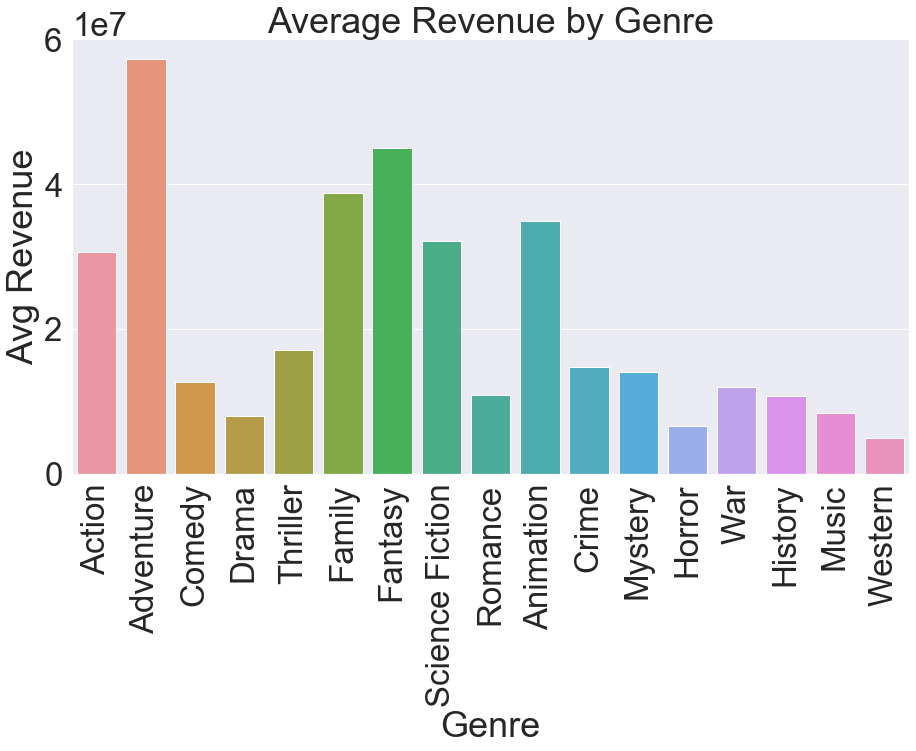

In [48]:
plt.figure(figsize=(15,8))
sns.set(font_scale=3)
sns.barplot(x=Avg_Genre_Revenue['Genre'], y=Avg_Genre_Revenue['Avg Revenue']);
plt.ylabel('Avg Revenue')
plt.title('Average Revenue by Genre')
plt.xticks(rotation='vertical');

### In the same order as they appear in the previous bar graph, it is noteworthy that there are considerable changes in the overall Genre revenue rankings. Specifically, "Family", "Fantasy", and "Animation" show considerably more revenue relative to the others. This shows that throughout the last several decades, the families-with-children demographic is likely a big money-maker. 

## Create df of top grossing movie by Year (create 'Year' column first)

In [38]:
import datetime as dt
movies_meta['release_date']= pd.to_datetime(movies_meta['release_date'], errors='coerce') 
movies_meta['Year'] = [y.year for y in movies_meta['release_date']]

In [39]:
ytr = pd.DataFrame(movies_meta[['Year','title','revenue']])
ytr= ytr[ytr['revenue']>=100]

In [40]:
Top_Movies = pd.DataFrame(ytr.loc[ytr.groupby(["Year"])["revenue"].idxmax()])
Top_Movies = Top_Movies.sort_values(by = 'Year', ascending = False)
Top_Movies.head(10)

,Year,title,revenue
42222,2017.0,Beauty and the Beast,1.262886e+09
26567,2016.0,Captain America: Civil War,1.153304e+09
26555,2015.0,Star Wars: The Force Awakens,2.068224e+09
23617,2014.0,Transformers: Age of Extinction,1.091405e+09
22110,2013.0,Frozen,1.274219e+09
17818,2012.0,The Avengers,1.519558e+09
17437,2011.0,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
15348,2010.0,Toy Story 3,1.066970e+09
14551,2009.0,Avatar,2.787965e+09
12481,2008.0,The Dark Knight,1.004558e+09


### Test Image Imports from MoviePosterDB

In [49]:
%pylab inline
from IPython.display import Image
pd.set_option('colwidth',200)
from bs4 import BeautifulSoup

Populating the interactive namespace from numpy and matplotlib


## Input Function that shows movie poster of top grossing movie in a given year.

### Link to Google CoLab: https://colab.research.google.com/drive/1xfMNoP8dq8JfzBc-FPvUZ0ky07tqnD6v?authuser=2#scrollTo=DQdYukZF-rsq

### It is interesting that movie posters used to use hand-drawn images quite frequently even though photographs were an option for movie studios. This may be due to the fact that photographs used to be much more expensive. Additionally, older movie posters seemed to use more narration to describe the plot. This may be due to the fact that movie trailers and advertisements were not as frequent or readily accesible as they are now and a movie poster may be the only way a production studio could communicate information about their movies. 

In [46]:
def Top_Gross_Movie():
    y = input ('The Top Grossing Movie From (year): ')
    my = Top_Movies.title[Top_Movies['Year']==int(y)].iloc[0]
    my = my.replace(':', '')
    my = my.replace("'", '%27')
    i_url = 'https://www.movieposterdb.com/search?v=grid&sort=num_posters&direction=DESC&per_page=50&q='+str(my.replace(' ', '+'))+'&director=&artist=&genre=&year_from='+str(y)+'&year_to='+str(y)+'#&gid=1&pid=1'
    i_page = requests.get(i_url)
    i_page_soup = BeautifulSoup(i_page.text, 'html.parser')
    images =i_page_soup.findAll('img')
    image_list=[]
    for image in images:
        image_list.append(image['src'])
    pos = str(image_list[1]).replace('/posters', '/xl')
    pos = pos.replace('s_', 'xl_')
    return Image(url=str(pos))

In [66]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 2009


In [65]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 2005


In [62]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 1985


In [61]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 1977


In [58]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 1968


In [59]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 1966


In [60]:
Top_Gross_Movie()

The Top Grossing Movie From (year): 1964


## Conclusion
##Through our analysis above we can make the following conclusions about the Movie Industry in the US. 
1. Adventure, Fantasy, and Family genres tend to bring the most revenue to the production firms. 
2. Recently Action is VERY numerous among the top grossing movies. This may be due to the fact that in more recent years, Action and Adventure movies have incorporated more and more visual effects, which have proven to be quite popular. 
3. Throughout all genres, movies tend to incorporate themes of romance and relationship to some extent. "Relationship" and "Love" are the words that appeared most frequently also the most attractive themes to the general audience. These findings are also practical since even movies from the Marvel’s studio that belongs to Action and Adventure genre would have some elements of romance relationship around the main character to satisfy the preferences of the general public and gross higher revenues. 

The above findings account for the trends in the movie industry for recent decades. Movie production companies could refer to these classic patterns when making new movies. However, as technology in the movie-making industry continues to grow, the shift of preference of the audience is always possible and the industry should be ready to change anytime.